In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
flight_details = pd.read_csv("C:/Users/vkche/OneDrive/Documents/Vinodh_Documents/Masters/Quarter 3/Python/WEEK 4/flights/flights.csv", low_memory=False)
airport_details = pd.read_csv("C:/Users/vkche/OneDrive/Documents/Vinodh_Documents/Masters/Quarter 3/Python/WEEK 4/flights/airports.csv")
airline_details = pd.read_csv("C:/Users/vkche/OneDrive/Documents/Vinodh_Documents/Masters/Quarter 3/Python/WEEK 4/flights/airlines.csv")

In [4]:
# converting all column names to lower case
flight_details.columns = map(str.lower, flight_details.columns)
airport_details.columns = map(str.lower, airport_details.columns)
airline_details.columns = map(str.lower, airline_details.columns)


In [5]:
# gathering data to dictionary
airline_name = airline_details.set_index('iata_code')['airline'].to_dict()

airport_city = airport_details.set_index('iata_code')['city'].to_dict()

airport_name = airport_details.set_index('iata_code')['airport'].to_dict()

airport_state = airport_details.set_index('iata_code')['state'].to_dict()

airport_country = airport_details.set_index('iata_code')['country'].to_dict()

airport_latitude = airport_details.set_index('iata_code')['latitude'].to_dict()

airport_longitude = airport_details.set_index('iata_code')['longitude'].to_dict()

In [6]:
flight_details['flight_name'] = flight_details['airline'].map(airline_name)
flight_details['flight_name'] = flight_details['flight_name'].astype('category')

flight_details['dest_city'] = flight_details['destination_airport'].map(airport_city)
flight_details['dest_city'] = flight_details['dest_city'].astype('category')

flight_details['orig_city'] = flight_details['origin_airport'].map(airport_city)
flight_details['orig_city'] = flight_details['orig_city'].astype('category')

flight_details['dest_name'] = flight_details['destination_airport'].map(airport_name)
flight_details['dest_name'] = flight_details['dest_name'].astype('category')

flight_details['origin_name'] = flight_details['origin_airport'].map(airport_name)
flight_details['origin_name'] = flight_details['origin_name'].astype('category')


flight_details['orig_state'] = flight_details['origin_airport'].map(airport_state)
flight_details['orig_state'] = flight_details['orig_state'].astype('category')

flight_details['dest_state'] = flight_details['destination_airport'].map(airport_state)
flight_details['dest_state'] = flight_details['dest_state'].astype('category')

flight_details['orig_country'] = flight_details['origin_airport'].map(airport_country)
flight_details['orig_country'] = flight_details['orig_country'].astype('category')

flight_details['dest_country'] = flight_details['destination_airport'].map(airport_country)
flight_details['dest_country'] = flight_details['dest_country'].astype('category')

flight_details['dest_lat'] = flight_details['destination_airport'].map(airport_latitude)

flight_details['dest_lon'] = flight_details['destination_airport'].map(airport_latitude)

flight_details['orig_lat'] = flight_details['origin_airport'].map(airport_longitude)

flight_details['orig_lon'] = flight_details['origin_airport'].map(airport_longitude)

In [7]:
flight_details.dtypes

year                      int64
month                     int64
day                       int64
day_of_week               int64
airline                  object
flight_number             int64
tail_number              object
origin_airport           object
destination_airport      object
scheduled_departure       int64
departure_time          float64
departure_delay         float64
taxi_out                float64
wheels_off              float64
scheduled_time          float64
elapsed_time            float64
air_time                float64
distance                  int64
wheels_on               float64
taxi_in                 float64
scheduled_arrival         int64
arrival_time            float64
arrival_delay           float64
diverted                  int64
cancelled                 int64
cancellation_reason      object
air_system_delay        float64
security_delay          float64
airline_delay           float64
late_aircraft_delay     float64
weather_delay           float64
flight_n

<AxesSubplot:xlabel='year', ylabel='count'>

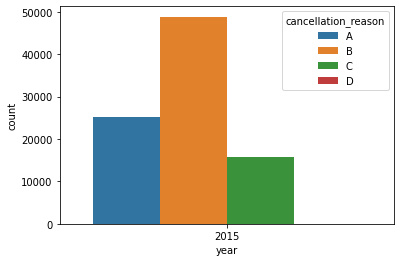

In [8]:
sns.countplot(x="year",hue="cancellation_reason",data=flight_details)


<AxesSubplot:xlabel='month', ylabel='count'>

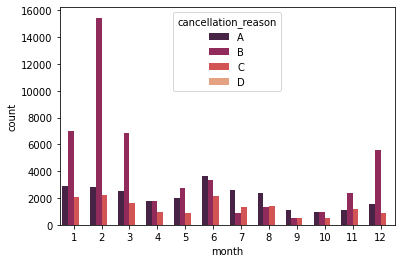

In [9]:
sns.countplot(x="month",hue="cancellation_reason",data=flight_details, palette="rocket")


<AxesSubplot:xlabel='day_of_week', ylabel='count'>

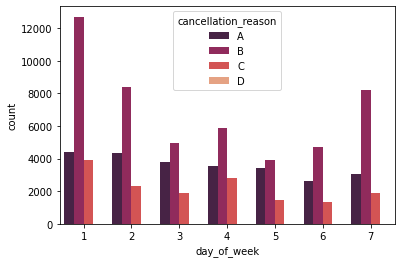

In [10]:
sns.countplot(x="day_of_week",hue="cancellation_reason",data=flight_details, palette="rocket")
 

<AxesSubplot:title={'center':'ARRIVAL DELAY IN VARIOUS AIRPORTS'}, xlabel='Airport Name', ylabel='Count'>

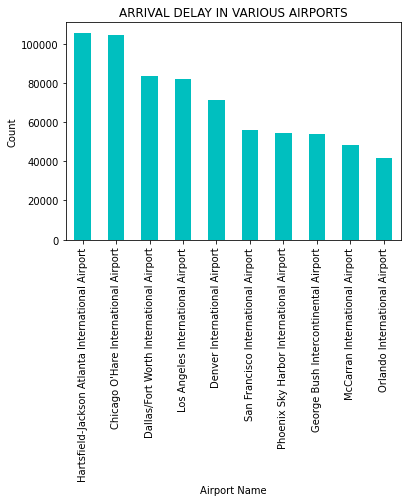

In [11]:
# Arrival Delays in Airports
airports_delay_arrival = flight_details[flight_details['arrival_delay'].notnull()]
airports_delay_arrival = airports_delay_arrival[airports_delay_arrival['dest_name'].notnull()]
airports_delay_arrival = airports_delay_arrival[['arrival_delay','dest_name']]
airports_delay_arrival['delay'] = np.where(airports_delay_arrival['arrival_delay'] >= 1, True, False)
airports_delay_arrival = airports_delay_arrival[airports_delay_arrival['delay']== True]
airports_delay_arrival = airports_delay_arrival['dest_name']
airports_delay_arrival.value_counts()[:10].plot.bar(xlabel="Airport Name", ylabel="Count",title = 'ARRIVAL DELAY IN VARIOUS AIRPORTS',color='c')


<AxesSubplot:title={'center':'DEPARTURE DELAY IN VARIOUS AIRPORTS'}, xlabel='Airport Name', ylabel='Count'>

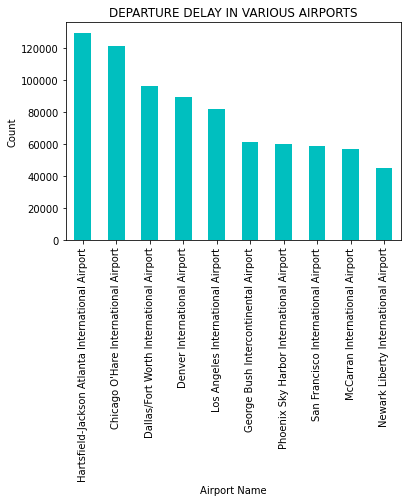

In [12]:
# Departure Delays in Airports
airports_delay_departure = flight_details[flight_details['departure_delay'].notnull()]
airports_delay_departure = airports_delay_departure[airports_delay_departure['origin_name'].notnull()]
airports_delay_departure = airports_delay_departure[['departure_delay','origin_name']]
airports_delay_departure['delay'] = np.where(airports_delay_departure['departure_delay'] >= 1, True, False)
airports_delay_departure = airports_delay_departure[airports_delay_departure['delay']== True]
airports_delay_departure = airports_delay_departure['origin_name']
airports_delay_departure.value_counts()[:10].plot.bar(xlabel="Airport Name", ylabel="Count",title = 'DEPARTURE DELAY IN VARIOUS AIRPORTS',color='c')

<AxesSubplot:title={'center':'ARRIVAL DELAYS IN A WEEK'}, xlabel='Day Of Week', ylabel='Count'>

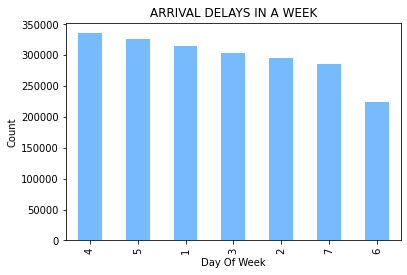

In [13]:
# Day of Week
#Arrival Delays
arrival_week_delay = flight_details[flight_details['arrival_delay'].notnull()]
arrival_week_delay = arrival_week_delay[['day_of_week','arrival_delay']]
arrival_week_delay['delay'] = np.where(arrival_week_delay['arrival_delay'] >= 1, True, False)
arrival_week_delay = arrival_week_delay[arrival_week_delay['delay']== True]
arrival_week_delay = arrival_week_delay['day_of_week']
arrival_week_delay.value_counts().plot.bar(xlabel="Day Of Week", ylabel="Count",title = 'ARRIVAL DELAYS IN A WEEK',color='xkcd:sky blue')



<AxesSubplot:title={'center':'DEPARTURE DELAYS IN A WEEK'}, xlabel='Day Of Week', ylabel='Count'>

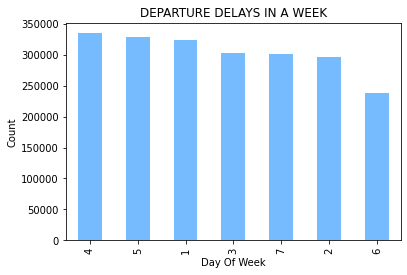

In [14]:
# Departure Delays
departure_week_delay = flight_details[flight_details['departure_delay'].notnull()]
departure_week_delay = departure_week_delay[['day_of_week','departure_delay']]
departure_week_delay['delay'] = np.where(departure_week_delay['departure_delay'] >= 1, True, False)
departure_week_delay = departure_week_delay[departure_week_delay['delay']== True]
departure_week_delay = departure_week_delay['day_of_week']
departure_week_delay.value_counts().plot.bar(xlabel="Day Of Week", ylabel="Count",title = 'DEPARTURE DELAYS IN A WEEK',color='xkcd:sky blue')

<AxesSubplot:title={'center':'ARRIVAL DELAYS IN A MONTH'}, xlabel='Month', ylabel='Count'>

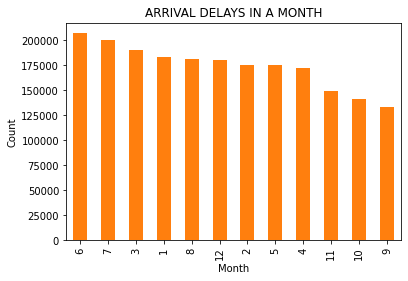

In [15]:
# Month Delays
#Arrival Delays
arrival_month_delay = flight_details[flight_details['arrival_delay'].notnull()]
arrival_month_delay = arrival_month_delay[['month','arrival_delay']]
arrival_month_delay['delay'] = np.where(arrival_month_delay['arrival_delay'] >= 1, True, False)
arrival_month_delay = arrival_month_delay[arrival_month_delay['delay']== True]
arrival_month_delay = arrival_month_delay['month']
arrival_month_delay.value_counts().plot.bar(xlabel="Month", ylabel="Count",title = 'ARRIVAL DELAYS IN A MONTH',color='tab:orange')



<AxesSubplot:title={'center':'DEPARTURE DELAYS IN A MONTH'}, xlabel='Month', ylabel='Count'>

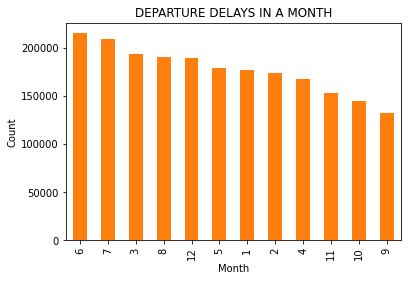

In [16]:
# Departure Delays
departure_month_delay = flight_details[flight_details['departure_delay'].notnull()]
departure_month_delay = departure_month_delay[['month','departure_delay']]
departure_month_delay['delay'] = np.where(departure_month_delay['departure_delay'] >= 1, True, False)
departure_month_delay = departure_month_delay[departure_month_delay['delay']== True]
departure_month_delay = departure_month_delay['month']
departure_month_delay.value_counts().plot.bar(xlabel="Month", ylabel="Count",title = 'DEPARTURE DELAYS IN A MONTH',color='tab:orange')

In [17]:
#How accurately does the weather forecast anticipate delays to planes?
weather_delays = flight_details.shape[0]
weather = flight_details[flight_details['weather_delay'].notna()]
weather = flight_details[flight_details['weather_delay']>0]
weather = weather.shape[0]
weather_delays_res = (weather/weather_delays)*100
print("In the year 2015, {0:.2f}% of were delayed due to Weather Conditions".format(weather_delays_res))

In the year 2015, 1.11% of were delayed due to Weather Conditions


([<matplotlib.patches.Wedge at 0x25689abf6d0>,
 [Text(0.8544662847652276, 0.6927390332582027, 'Southwest Airlines Co.'),
  Text(-0.28764161542747163, 1.0617260951273049, 'Delta Air Lines Inc.'),
  Text(-0.9945620983732639, 0.46994279702892605, 'American Airlines Inc.'),
  Text(-1.0606845957223816, -0.29145872503194753, 'Skywest Airlines Inc.'),
  Text(-0.6884125386905597, -0.8579558127162603, 'Atlantic Southeast Airlines'),
  Text(-0.09773731781845348, -1.0956493128303668, 'United Air Lines Inc.'),
  Text(0.375661370910159, -1.0338658203103053, 'American Eagle Airlines Inc.'),
  Text(0.6672470237803332, -0.8745178152881092, 'JetBlue Airways'),
  Text(0.8638549951624712, -0.6809952623424388, 'US Airways Inc.'),
  Text(0.9821374944444928, -0.4953846404626349, 'Alaska Airlines Inc.'),
  Text(1.047349830634978, -0.3362414791022711, 'Spirit Air Lines'),
  Text(1.078457140367623, -0.21663378404600092, 'Frontier Airlines Inc.'),
  Text(1.0935889365369353, -0.11858852340768362, 'Hawaiian Airli

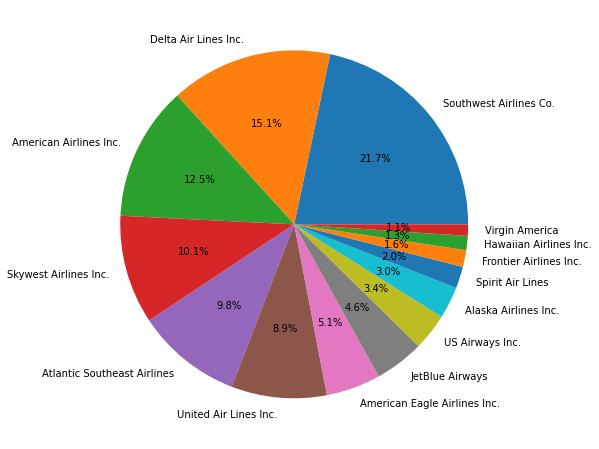

In [18]:
# Flight Travel sensus
airlines = list(flight_details['flight_name'].value_counts().index)
plt.figure(figsize=(15,8))
plt.pie(flight_details['flight_name'].value_counts(),labels = airlines,autopct = '%1.1f%%')

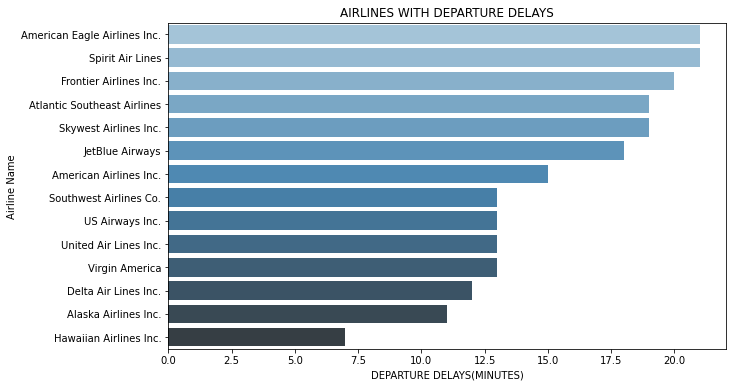

In [19]:
#Which airlines offer the most reliable service with the fewest possible delays?
#Departure

airline_departure = flight_details[flight_details['departure_delay']>0]
airline_departure = airline_departure[['flight_name','departure_delay']]
airline_departure = airline_departure.groupby(['flight_name'])['departure_delay'].median().reset_index()
airline_departure = airline_departure.sort_values(by='departure_delay', ascending=False, na_position='first')

plt.figure(figsize=(10,6))
sns.barplot(x='departure_delay', 
            y="flight_name", 
            data=airline_departure, 
            order=airline_departure.sort_values('departure_delay',ascending = False).flight_name,
           palette="Blues_d")
plt.ylabel('Airline Name')
plt.xlabel('DEPARTURE DELAYS(MINUTES)')
plt.title('AIRLINES WITH DEPARTURE DELAYS')
plt.show()






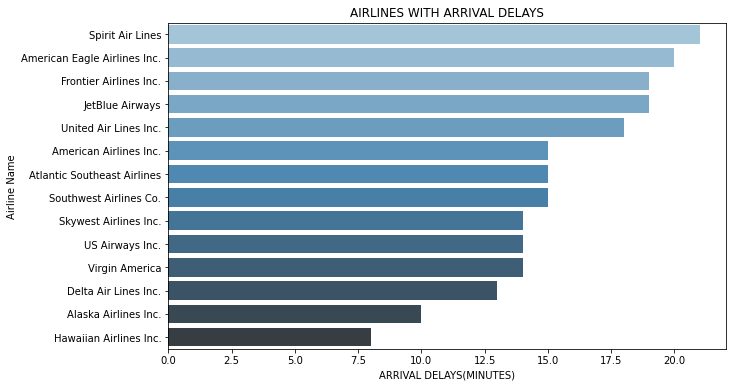

In [20]:
#Arrival
airline_arrival = flight_details[flight_details['arrival_delay']>0]
airline_arrival = airline_arrival[['flight_name','arrival_delay']]
airline_arrival = airline_arrival.groupby(['flight_name'])['arrival_delay'].median().reset_index()
airline_arrival = airline_arrival.sort_values(by='arrival_delay', ascending=False, na_position='first')

plt.figure(figsize=(10,6))
sns.barplot(x='arrival_delay', 
            y="flight_name", 
            data=airline_arrival, 
            order=airline_arrival.sort_values('arrival_delay',ascending = False).flight_name,
           palette="Blues_d")
plt.ylabel('Airline Name')
plt.xlabel('ARRIVAL DELAYS(MINUTES)')
plt.title('AIRLINES WITH ARRIVAL DELAYS')
plt.show()

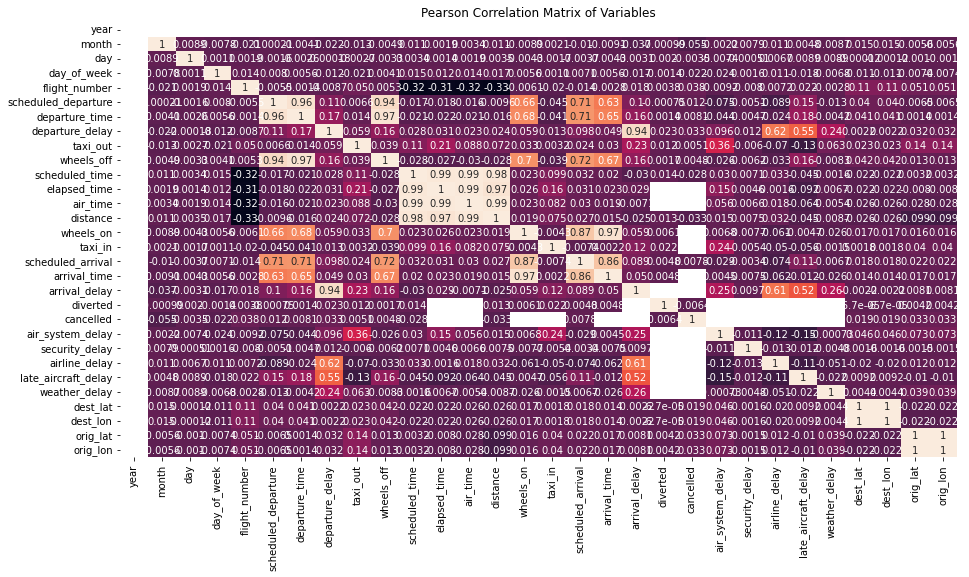

In [21]:
# PREDICTION MODELS -- DECISION TREE

corr_matrix = flight_details.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cbar=False)
plt.title("Pearson Correlation Matrix of Variables")
plt.show()

In [22]:
flights_info = flight_details.drop(['year','flight_number','airline','distance','tail_number','taxi_out','scheduled_time','departure_time','wheels_off','elapsed_time','air_time','wheels_on','day_of_week','taxi_in','cancellation_reason','origin_airport', 'destination_airport', 'arrival_time', 'arrival_delay','cancelled','flight_name','dest_city','orig_city','dest_name','origin_name','orig_state','dest_state','orig_country','dest_country','orig_lat','orig_lon','dest_lat','dest_lon'],axis=1)

In [23]:
delay =[]
for row in flight_details['arrival_delay']:
    if row > 60:
        delay.append(3)
    elif row > 30:
        delay.append(2)
    elif row > 15:
        delay.append(1)
    else:
        delay.append(0)        
flights_info['delay'] = delay

In [24]:
flights_info.describe()

month           day  scheduled_departure  departure_delay  \
count  5.819079e+06  5.819079e+06         5.819079e+06     5.732926e+06   
mean   6.524085e+00  1.570459e+01         1.329602e+03     9.370158e+00   
std    3.405137e+00  8.783425e+00         4.837518e+02     3.708094e+01   
min    1.000000e+00  1.000000e+00         1.000000e+00    -8.200000e+01   
25%    4.000000e+00  8.000000e+00         9.170000e+02    -5.000000e+00   
50%    7.000000e+00  1.600000e+01         1.325000e+03    -2.000000e+00   
75%    9.000000e+00  2.300000e+01         1.730000e+03     7.000000e+00   
max    1.200000e+01  3.100000e+01         2.359000e+03     1.988000e+03   

       scheduled_arrival      diverted  air_system_delay  security_delay  \
count       5.819079e+06  5.819079e+06      1.063439e+06    1.063439e+06   
mean        1.493808e+03  2.609863e-03      1.348057e+01    7.615387e-02   
std         5.071647e+02  5.102012e-02      2.800368e+01    2.143460e+00   
min         1.000000e+00  0.000000e+00      0.000000e+00    0.000000e+00   
25%         1.110000e+03  0.000000e+00      0.000000e+00    0.000000e+00   
50%         1.520000e+03  0.000000e+00      2.000000e+00    0.000000e+00   
75%         1.918000e+03  0.000000e+00      1.800000e+01    0.000000e+00   
max         2.400000e+03  1.000000e+00      1.134000e+03    5.730000e+02   

       airline_delay  late_aircraft_delay  weather_delay         delay  
count   1.063439e+06         1.063439e+06   1.063439e+06  5.819079e+06  
mean    1.896955e+01         2.347284e+01   2.915290e+00  3.394501e-01  
std     4.816164e+01         4.319702e+01   2.043334e+01  8.130325e-01  
min     0.000000e+00         0.000000e+00   0.000000e+00  0.000000e+00  
25%     0.000000e+00         0.000000e+00   0.000000e+00  0.000000e+00  
50%     2.000000e+00         3.000000e+00   0.000000e+00  0.000000e+00  
75%     1.900000e+01         2.900000e+01   0.000000e+00  0.000000e+00  
max     1.971000e+03         1.331000e+03   1.211000e+03  3.000000e+00

In [25]:
flights_info=flights_info.fillna(flights_info.mean())

In [26]:
flights_info.tail(20)

month  day  scheduled_departure  departure_delay  scheduled_arrival  \
5819059     12   31                 2359             -8.0                530   
5819060     12   31                 2359             -5.0                525   
5819061     12   31                 2359             -3.0                504   
5819062     12   31                 2359              6.0                518   
5819063     12   31                 2359              2.0                606   
5819064     12   31                 2359             -3.0                721   
5819065     12   31                 2359             -7.0                604   
5819066     12   31                 2359             -2.0                742   
5819067     12   31                 2359             -8.0                543   
5819068     12   31                 2359             -1.0                603   
5819069     12   31                 2359            159.0                741   
5819070     12   31                 2359              0.0                805   
5819071     12   31                 2359             16.0                608   
5819072     12   31                 2359              7.0                530   
5819073     12   31                 2359             16.0                546   
5819074     12   31                 2359             -4.0                819   
5819075     12   31                 2359             -4.0                446   
5819076     12   31                 2359             -9.0                440   
5819077     12   31                 2359             -6.0                340   
5819078     12   31                 2359             15.0                440   

         diverted  air_system_delay  security_delay  airline_delay  \
5819059         0         13.480568        0.076154      18.969547   
5819060         0         13.480568        0.076154      18.969547   
5819061         0         13.480568        0.076154      18.969547   
5819062         0         13.480568        0.076154      18.969547   
5819063         0         13.480568        0.076154      18.969547   
5819064         0         13.480568        0.076154      18.969547   
5819065         0         13.480568        0.076154      18.969547   
5819066         0         13.480568        0.076154      18.969547   
5819067         0         13.480568        0.076154      18.969547   
5819068         0         13.480568        0.076154      18.969547   
5819069         0          0.000000        0.000000     159.000000   
5819070         0         13.480568        0.076154      18.969547   
5819071         0          1.000000        0.000000      16.000000   
5819072         0         13.480568        0.076154      18.969547   
5819073         0         13.480568        0.076154      18.969547   
5819074         0         13.480568        0.076154      18.969547   
5819075         0         13.480568        0.076154      18.969547   
5819076         0         13.480568        0.076154      18.969547   
5819077         0         13.480568        0.076154      18.969547   
5819078         0         13.480568        0.076154      18.969547   

         late_aircraft_delay  weather_delay  delay  
5819059            23.472838        2.91529      0  
5819060            23.472838        2.91529      0  
5819061            23.472838        2.91529      0  
5819062            23.472838        2.91529      0  
5819063            23.472838        2.91529      0  
5819064            23.472838        2.91529      0  
5819065            23.472838        2.91529      0  
5819066            23.472838        2.91529      0  
5819067            23.472838        2.91529      0  
5819068            23.472838        2.91529      0  
5819069             0.000000        0.00000      3  
5819070            23.472838        2.91529      0  
5819071             0.000000        0.00000      1  
5819072            23.472838        2.91529      0  
5819073            23.472838        2.91529      0  
5819074  

<AxesSubplot:>

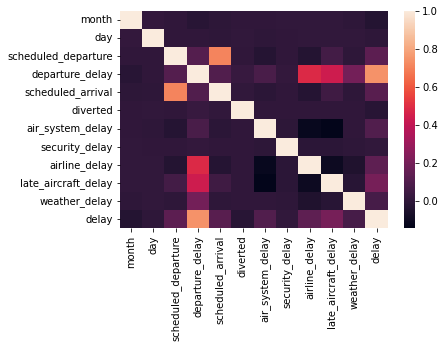

In [27]:
sns.heatmap(flights_info.corr())

In [28]:
info = flights_info.values
X, y = info[:,:-1], info[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [30]:
flights_info.head(10)

month  day  scheduled_departure  departure_delay  scheduled_arrival  \
0      1    1                    5            -11.0                430   
1      1    1                   10             -8.0                750   
2      1    1                   20             -2.0                806   
3      1    1                   20             -5.0                805   
4      1    1                   25             -1.0                320   
5      1    1                   25             -5.0                602   
6      1    1                   25             -6.0                526   
7      1    1                   30             14.0                803   
8      1    1                   30            -11.0                545   
9      1    1                   30              3.0                711   

   diverted  air_system_delay  security_delay  airline_delay  \
0         0         13.480568        0.076154      18.969547   
1         0         13.480568        0.076154      18.969547   
2         0         13.480568        0.076154      18.969547   
3         0         13.480568        0.076154      18.969547   
4         0         13.480568        0.076154      18.969547   
5         0         13.480568        0.076154      18.969547   
6         0         13.480568        0.076154      18.969547   
7         0         13.480568        0.076154      18.969547   
8         0         13.480568        0.076154      18.969547   
9         0         13.480568        0.076154      18.969547   

   late_aircraft_delay  weather_delay  delay  
0            23.472838        2.91529      0  
1            23.472838        2.91529      0  
2            23.472838        2.91529      0  
3            23.472838        2.91529      0  
4            23.472838        2.91529      0  
5            23.472838        2.91529      0  
6            23.472838        2.91529      0  
7            23.472838        2.91529      0  
8            23.472838        2.91529      0  
9            23.472838        2.91529      0

In [31]:
features = StandardScaler().fit_transform(X_train, X_test)

In [32]:
X_train[0]

array([1.10000000e+01, 8.00000000e+00, 9.05000000e+02, 6.00000000e+00,
       1.10500000e+03, 0.00000000e+00, 1.34805682e+01, 7.61538744e-02,
       1.89695469e+01, 2.34728377e+01, 2.91528992e+00])

In [33]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

In [35]:
pred_prob = clf.predict_proba(X_test)

Predict_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')
Predict_score

0.9983340134817513

In [8]:
#LOGISTIC REGRESSION

from Group5_Capstone_Code import *

In [9]:
X_train, X_test, y_train, y_test = preprocess_inputs(flight_details)

In [10]:
y_train.value_counts()

0    4010206
1      63149
Name: cancelled, dtype: int64

In [11]:
model = LogisticRegression()
model.fit(X_test, y_test)

LogisticRegression()

In [12]:
model1 = DecisionTreeClassifier()

model1 = model1.fit(X_train,y_train)

In [115]:
evaluate_model(model1, X_test, y_test)

ACCURACY: 100.00%
               precision    recall  f1-score   support

not cancelled       1.00      1.00      1.00   1718989
    cancelled       1.00      1.00      1.00     26735

     accuracy                           1.00   1745724
    macro avg       1.00      1.00      1.00   1745724
 weighted avg       1.00      1.00      1.00   1745724



In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

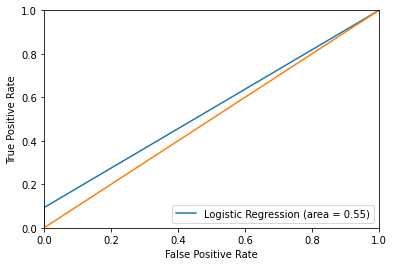

In [64]:
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test)[:])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [15]:
evaluate_model(model, X_test, y_test)

ACCURACY: 98.62%
               precision    recall  f1-score   support

not cancelled       0.99      1.00      0.99   1718989
    cancelled       0.98      0.10      0.18     26735

     accuracy                           0.99   1745724
    macro avg       0.98      0.55      0.59   1745724
 weighted avg       0.99      0.99      0.98   1745724



In [18]:
# RANDOM FOREST

In [68]:
flights_info = flight_details.drop(['dest_city', 'orig_city', 'dest_name', 'origin_name','orig_state', 'origin_airport','destination_airport','dest_state','orig_country', 'dest_country', 'dest_lat','flight_name','dest_lon', 'orig_lat', 'orig_lon','scheduled_time','scheduled_arrival','year', 'flight_number', 'tail_number', 'departure_time', 'taxi_out', 'wheels_off', 'elapsed_time', 'air_time', 'wheels_on', 'taxi_in', 'arrival_time','diverted', 'cancelled', 'cancellation_reason', 'air_system_delay', 'security_delay', 'airline_delay', 'late_aircraft_delay', 'weather_delay'],axis=1)

In [69]:
flights_info=flights_info.dropna()

In [70]:
flights_info['airline'].head(10)

0    AS
1    AA
2    US
3    AA
4    AS
5    DL
6    NK
7    US
8    AA
9    DL
Name: airline, dtype: object

In [71]:
flights_info.columns

Index(['month', 'day', 'day_of_week', 'airline', 'scheduled_departure',
       'departure_delay', 'distance', 'arrival_delay'],
      dtype='object')

In [72]:
Week_indexes_sun =flights_info[flights_info['day_of_week']==1].index
Week_indexes_mon=flights_info[flights_info['day_of_week']==2].index
Week_indexes_tue=flights_info[flights_info['day_of_week']==3].index
Week_indexes_wed=flights_info[flights_info['day_of_week']==4].index
Week_indexes_thu=flights_info[flights_info['day_of_week']==5].index
Week_indexes_fri=flights_info[flights_info['day_of_week']==6].index
Week_indexes_sat=flights_info[flights_info['day_of_week']==7].index

In [73]:
flights_info.loc[Week_indexes_sun,'day_of_week']="sunday"
flights_info.loc[Week_indexes_mon,'day_of_week']="monday"
flights_info.loc[Week_indexes_tue,'day_of_week']="tuesday"
flights_info.loc[Week_indexes_wed,'day_of_week']="wednesday"
flights_info.loc[Week_indexes_thu,'day_of_week']="thursday"
flights_info.loc[Week_indexes_fri,'day_of_week']="friday"
flights_info.loc[Week_indexes_sat,'day_of_week']="saturday"

In [74]:
departure_delay_week = pd.DataFrame(flights_info)
values = ['airline','day_of_week']
df_final =pd.get_dummies(departure_delay_week[values],drop_first=True)
df_final.columns
departure_delay_week.drop("airline",axis=1,inplace=True)
departure_delay_week.drop("day_of_week",axis=1,inplace=True)

df_rf =pd.concat([departure_delay_week,df_final],axis=1)
df_rf.head()

month  day  scheduled_departure  departure_delay  distance  arrival_delay  \
0      1    1                    5            -11.0      1448          -22.0   
1      1    1                   10             -8.0      2330           -9.0   
2      1    1                   20             -2.0      2296            5.0   
3      1    1                   20             -5.0      2342           -9.0   
4      1    1                   25             -1.0      1448          -21.0   

   airline_AS  airline_B6  airline_DL  airline_EV  airline_F9  airline_HA  \
0           1           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           1           0           0           0           0           0   

   airline_MQ  airline_NK  airline_OO  airline_UA  airline_US  airline_VX  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           1           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   airline_WN  day_of_week_monday  day_of_week_saturday  day_of_week_sunday  \
0           0                   0                     0                   0   
1           0                   0                     0                   0   
2           0                   0                     0                   0   
3           0                   0                     0                   0   
4           0                   0                     0                   0   

   day_of_week_thursday  day_of_week_tuesday  day_of_week_wednesday  
0                     0                    0                      1  
1                     0                    0                      1  
2                     0                    0                      1  
3                     0                    0                      1  
4                     0                    0                      1

In [75]:
df_rf = df_rf.sample(n=100000)

In [76]:
X=df_rf.drop("departure_delay",axis=1)
Y=df_rf.departure_delay

In [77]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [78]:
X_train.shape

(80000, 24)

In [79]:
X.head(10)

month  day  scheduled_departure  distance  arrival_delay  airline_AS  \
5038440     11   11                 1308       541           15.0           0   
1917990      5    2                 2015       438           14.0           0   
2737802      6   22                  510       612          -14.0           0   
5392820     12    4                 1015       159          -17.0           0   
5814240     12   31                 1430       573          -11.0           0   
3869049      8   28                 1600       581            3.0           0   
3535833      8    8                 1220       404          -11.0           0   
1296264      3   25                 1223       100           -5.0           0   
2232439      5   22                  816       989            5.0           0   
1006960      3    7                 1715      2562           10.0           1   

         airline_B6  airline_DL  airline_EV  airline_F9  airline_HA  \
5038440           0           0           0           0           0   
1917990           0           0           0           0           0   
2737802           0           0           0           0           0   
5392820           0           0           0           0           0   
5814240           0           0           0           0           0   
3869049           0           0           0           0           0   
3535833           0           1           0           0           0   
1296264           0           0           0           0           1   
2232439           0           0           0           0           0   
1006960           0           0           0           0           0   

         airline_MQ  airline_NK  airline_OO  airline_UA  airline_US  \
5038440           0           0           1           0           0   
1917990           1           0           0           0           0   
2737802           0           0           0           0           0   
5392820           0           0           0           0           0   
5814240           0           0           0           0           0   
3869049           0           0           0           0           0   
3535833           0           0           0           0           0   
1296264           0           0           0           0           0   
2232439           0           0           0           0           0   
1006960           0           0           0           0           0   

         airline_VX  airline_WN  day_of_week_monday  day_of_week_saturday  \
5038440           0           0                   0                     0   
1917990           0           0                   0                     0   
2737802           0           0                   0                     0   
5392820           0           1                   0                     0   
5814240           0           0                   0                     0   
3869049           0           1                   0                     0   
3535833           0           0                   0                     0   
1296264           0           0                   0                     0   
2232439           0           0                   0                     0   
1006960           0           0                   0                     0   

         day_of_week_sunday  day_of_week_thursday  day_of_week_tuesday  \
5038440                   0                     0                    1   
1917990                   0                     0                    0   
2737802                   1                     0                    0   
5392820                   0                     1                    0   
5814240                   0                     0                    0   
3869049                   0                     1                    0   
3535833                   0                     0                    0   
1296264                   0                     0                    1   
2232439                   0            

In [80]:
Y.head(10)

5038440    20.0
1917990    30.0
2737802    -3.0
5392820    -3.0
5814240    -2.0
3869049     0.0
3535833     6.0
1296264    -3.0
2232439     1.0
1006960     5.0
Name: departure_delay, dtype: float64

In [81]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [82]:
reg_rf.score(X_train,y_train)

0.9892467118246491

In [83]:
reg_rf.score(X_test,y_test)

0.9260109086708541

In [86]:
y_pred = reg_rf.predict(X_test)

In [97]:
import sklearn.metrics as metrics
met=metrics.r2_score(y_test,y_pred)
met

0.9260109086708541

In [88]:
import sklearn.metrics as metrics
y_pred = reg_rf.predict(X_test)


print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE: 6.1693835
MSE: 99.56396040499999
RMSE: 9.978174201977032


In [89]:
pred =pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pred

Actual  Predicted
5717916     9.0       2.29
2064811    -3.0      -4.10
4281450    -4.0      -4.23
4086472     3.0       0.14
341626      0.0      -0.40
898046     15.0       0.53
2519167    -5.0      -3.89
320194     -2.0       0.74
859698      9.0       9.13
5237       24.0       5.03
2572924    -4.0       3.85
4217239    -7.0      -1.05
3698822    -4.0      -3.39
213238      0.0      -1.48
530242     -3.0      -4.72
3892997    -6.0      -3.78
3487199    24.0      11.06
1652062    -1.0       0.96
4139712    34.0      21.36
675436     -3.0       0.97
3901925    89.0      91.13
3580126    -1.0      -1.69
3102304    58.0      57.41
989108      4.0       2.53
5432375    22.0      27.76
901335     -2.0      -3.20
214419     -3.0      -6.30
524447     10.0      14.52
1987275    -2.0      -2.27
5713522    -8.0      -4.33
542145     -2.0       1.30
2876179     1.0       0.68
5561102    -3.0      -4.63
5133528    -1.0      -3.25
3530635    -1.0      -6.52
2481105    -5.0      -4.05
1221878    -6.0       2.42
1539667     5.0      -1.16
2663236    -3.0      -2.34
4714528     7.0       6.54
734031     -4.0      -0.33
1077176    -4.0      -3.18
2978115    -5.0       1.21
3996677    -6.0      -4.45
3747387    -3.0      -2.61
1668710    -3.0       2.10
3685150    -1.0       1.16
1728315    -9.0       3.43
2193430    -7.0      -4.35
5336922     6.0       2.54
4742890    39.0     147.82
4791428    -7.0       2.99
4282475    -5.0       1.10
4247727    -5.0      -4.67
5126317    42.0      43.75
3044393    -1.0      -1.09
1452973    -1.0       8.18
44134       8.0       1.73
9915       35.0       4.05
5524859    -8.0      -4.41
2845536    -3.0      -2.25
1671427    -6.0      -5.78
2815235     0.0      -1.74
3772968    -8.0      -6.60
5140977    -8.0      -4.02
2879681     5.0      -2.08
3037912    40.0      21.00
5104955    -1.0      -2.80
2628161    11.0       6.10
5673885    -2.0      -1.77
5614066    -3.0      -3.10
1129059    -5.0      -4.19
4353411    -2.0      -2.54
5384990    -3.0      -2.36
1476855    -4.0      -0.06
1042688    -6.0      -0.37
2239551    -2.0      -7.77
3298102    -1.0      -3.86
5588829    -4.0       3.80
531123     -6.0      -3.70
3874276    -3.0      -0.70
1415933     3.0      -0.05
466993      3.0       5.99
4017959    -5.0      -4.68
2918119     2.0       5.31
36078      18.0      11.76
3943769    -8.0       0.71
4524542     3.0      -2.10
5457740    37.0      36.11
845818     39.0      43.83
8242        0.0      -0.88
3765742    -2.0      -2.38
4624230   -11.0      -1.68
4356104    30.0      22.77
2908971    -3.0      -3.12
3727257    12.0      45.52
2268656    -2.0      -4.64
260065     -6.0      -3.70
4570608    13.0       6.85
2941646     0.0      -3.37
3842422    -2.0      -4.05
5773884     6.0       6.65
3036657    14.0       9.49
4468393    -3.0      -4.55
11050      19.0       2.67
385325     -9.0      -1.40
3017391    14.0       6.28
3534016     4.0       4.55
5066351    -2.0       0.48
152040     20.0      15.75
2400193   165.0     197.25
3539048    -3.0      13.69
4777864    -5.0      -4.35
2396250    -7.0       1.32
3439898     0.0       8.86
2627017    -8.0      -5.71
4881513     4.0       9.36
3505936    -9.0      -6.84
3521161     7.0       1.47
5472851    -6.0      -3.70
4657732     0.0       3.56
2831821    27.0      17.03
4122039    -6.0      -5.62
3152912     9.0      14.29
4385301    20.0      21.39
3693889    -5.0       0.77
5652661     0.0       4.78
1207545     5.0       7.20
352060    -10.0      -3.81
2532142    25.0      30.72
3415183    -2.0      -0.73
653587     -8.0      -4.85
1446701    -1.0      -2.31
5716907   -10.0      -3.71
13207      -2.0       3.16
4771872    -4.0      -3.64
3931686    -6.0       1.85
251724     -1.0      -5.14
5263658    -5.0      -6.62
1793005    -1.0      -2.83
3070603     0.0      -5.98
5371678    -6.0      -0.45
392073     -5.0      -6.96
2593063    -3.0      -3.92
2359727    -9.0      -3.72
2803521    99.0     121.03
4062738    -7.0       0.33
3162912     6